# Data Cleaning 

Goal Of This IPYNB will be will clean and adjust data for the analysis phase.

* Remove null values
* Check for duplicates 
* Remove Unwanted columns

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Get Data
dataframe = pd.read_csv('kc_house_data.csv')

In [41]:
#Check the dataframe
dataframe.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [42]:
#Checking for Missing Data
dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
#Checking for Duplicate data


duplicatedrows = dataframe[dataframe.duplicated()]

print("Duplicated rows are :")
print(duplicatedrows)

Duplicated rows are :
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [44]:
#Turning Float to int
dataframe["price"] = dataframe["price"].astype(int)
dataframe["bathrooms"] = dataframe["bathrooms"].astype(int)
dataframe["floors"] = dataframe["floors"].astype(int)
dataframe["lat"] = dataframe["lat"].astype(int)
dataframe["long"] = dataframe["long"].astype(int)

In [45]:
dataframe.dtypes

id                int64
date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat               int64
long              int64
sqft_living15     int64
sqft_lot15        int64
dtype: object

# Monthly Mortgage calculation

# M = P [ i(1 + i)^n ] / [ (1 + i)^n – 1]


* M = monthly mortgage payment
* P = the principal, or the initial amount you borrowed.
* i = your monthly interest rate. Your lender likely lists interest rates as an annual figure, so you’ll need to divide by 12, for each month of the year. So, if your rate is 3.6%, then the monthly rate will look like this: 0.036/12 = 0.003.
* n = the number of payments over the life of the loan. If you take out a 30-year fixed rate mortgage, this means: n = 30 years x 12 months per year, or 360 payments.

In [49]:
P = dataframe['price']

In [56]:
#Formula to calculate monthly mortgage

dataframe['Monthly_Mortage']= (dataframe['price']*[0.003*(1+0.003)**360]/[(1+0.003)**360-1])

In [57]:
#Round two decimals
dataframe['Monthly_Mortage']=round(dataframe['Monthly_Mortage'],2)

# Calculate monthly rent in kings county


Rent per month 

1 bedroom = $ 1300

2 bedrooms = $ 1500

3 bedrooms = $ 2750

4 bedrooms = $ 3250


rent prices are gathered from the following source.
https://www.bestplaces.net/cost_of_living/county/washington/king

# Calculate Net Profit

Net profit is the cashflow remianing from the monthly mortage.



In [58]:
# Create the dictionary 
event_dictionary ={1 : 1300, 2 : 1500, 3: 2750,4:3250,5 :3540} 
  
# Add a new column named 'Rent' 
dataframe['Possible_Rent'] = dataframe['bedrooms'].map(event_dictionary) 

In [59]:
#Formula for the rent calculation
dataframe['Net_Profit'] = dataframe['Possible_Rent'] - dataframe['Monthly_Mortage']

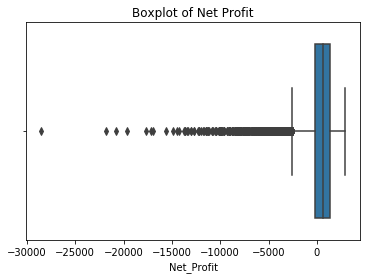

In [60]:
#Net profit
sns.boxplot(x='Net_Profit', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Net Profit')
plt.show()

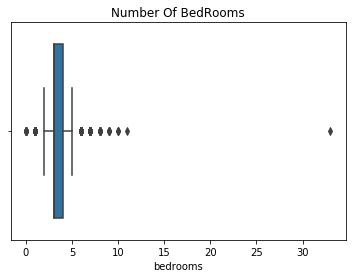

In [61]:
#Bed Rooms
sns.boxplot(x='bedrooms', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number Of BedRooms')
plt.show()

In [62]:
#Since We only have the rent rent data under 6 rooms we will reduce 
dataframe = dataframe[(dataframe['bedrooms'] < 6)&(dataframe['bedrooms'] >= 1) ]

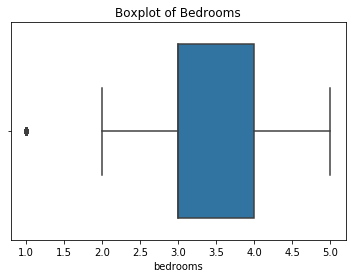

In [63]:
#Box Plot of BedRooms
sns.boxplot(x='bedrooms', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Bedrooms')
plt.show()

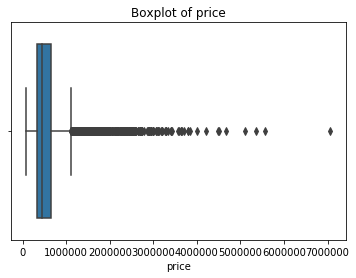

In [64]:
sns.boxplot(x='price', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of price')
plt.show()

In [71]:
#Reduce the price to keep it under 4 million Finding minium
dataframe = dataframe[(dataframe['price'] < 3000000) & (dataframe['price'] > 100000)]

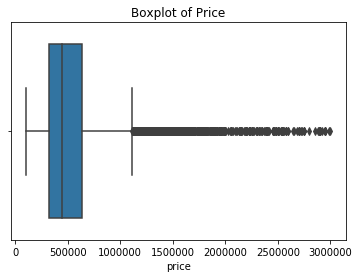

In [72]:
sns.boxplot(x='price', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Price')
plt.show()

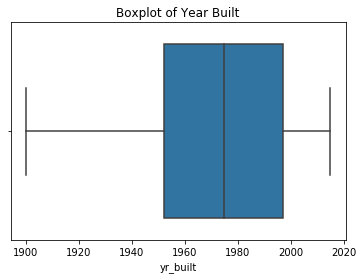

In [73]:
sns.boxplot(x='yr_built', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Year Built')
plt.show()

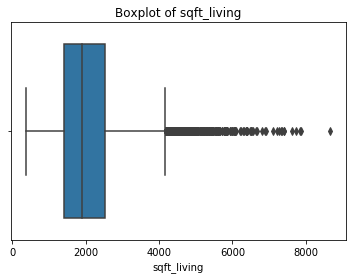

In [76]:
sns.boxplot(x='sqft_living', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of sqft_living')
plt.show()

# BUILDING CONDITION
Relative to age and grade. Coded 1-5.

* 1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
* 2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
* 3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
* 4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
* 5 = Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

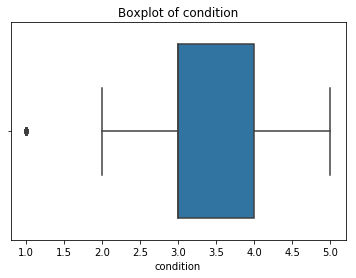

In [77]:
#Condition 
sns.boxplot(x='condition', data=dataframe)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of condition')
plt.show()

In [78]:
#Drop columns 
dataframe.drop(['id','date','waterfront','view','grade','yr_renovated','sqft_basement','sqft_living15','sqft_lot15'],axis = 1,inplace = True)

In [79]:
dataframe

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,Monthly_Mortage,Possible_Rent,Net_Profit
0,221900,3,1,1180,5650,1,3,1180,1955,98178,47,-122,1008.86,2750.0,1741.14
1,538000,3,2,2570,7242,2,3,2170,1951,98125,47,-122,2445.99,2750.0,304.01
2,180000,2,1,770,10000,1,3,770,1933,98028,47,-122,818.36,1500.0,681.64
3,604000,4,3,1960,5000,1,5,1050,1965,98136,47,-122,2746.06,3250.0,503.94
4,510000,3,2,1680,8080,1,3,1680,1987,98074,47,-122,2318.69,2750.0,431.31
5,1225000,4,4,5420,101930,1,3,3890,2001,98053,47,-122,5569.41,3250.0,-2319.41
6,257500,3,2,1715,6819,2,3,1715,1995,98003,47,-122,1170.71,2750.0,1579.29
7,291850,3,1,1060,9711,1,3,1060,1963,98198,47,-122,1326.88,2750.0,1423.12
8,229500,3,1,1780,7470,1,3,1050,1960,98146,47,-122,1043.41,2750.0,1706.59
9,323000,3,2,1890,6560,2,3,1890,2003,98038,47,-122,1468.50,2750.0,1281.50


In [80]:
#Saving File for the next Step
import pickle


with open('Clean_Final_Project.pickle', 'wb') as output:
    pickle.dump(dataframe, output)